In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
% cd /content/drive/My Drive/pi pictures

/content/drive/My Drive/pi pictures


In [0]:
import glob
backg = []
im_img = []
sad_img = []
for bimg in glob.glob('bg/*/*.jpg'):
  backg.append(bimg)
for imimg in glob.glob('data/imran/*/*.jpg'):
  im_img.append(imimg)
for sadimg in glob.glob('data/sakib/*/*.jpg'):
  sad_img.append(sadimg)

In [0]:
print(len(backg))
print(len(im_img))
print(len(sad_img))

150
450
450


In [0]:
import numpy as np
import random
def rotateImage(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [0]:
print(random.randint(-10,1))

-9


In [0]:
import cv2
cls0 = []
cls1 = []
cls2 = []
for im in backg:
  a = cv2.imread(im,0)
  a = cv2.resize(a, (224,224))

  cls0.append(a)
  a1 = cv2.flip(a,1)
  cls0.append(a1)
  x = random.randint(1,270)
  a2 = rotateImage(a,x)
  cls0.append(a2)
  x = random.randint(1,270)
  a2 = rotateImage(a,x)
  cls0.append(a2)
  x = random.randint(1,270)
  a2 = rotateImage(a,x)
  cls0.append(a2)
  x = random.randint(1,270)
  a2 = rotateImage(a,x)
  cls0.append(a2)
  x = random.randint(1,270)
  a2 = rotateImage(a,x)
  cls0.append(a2)
  x = random.randint(1,270)
  a2 = rotateImage(a,x)
  cls0.append(a2)
  x = random.randint(1,270)
  a2 = rotateImage(a,x)
  cls0.append(a2)

  
for im in im_img:
  a = cv2.imread(im,0)
  a = cv2.resize(a, (224,224))

  cls1.append(a)
  a1 = cv2.flip(a,1)
  cls1.append(a1)
  x = random.randint(1,270)
  a2 = rotateImage(a,x)
  cls1.append(a2)
  x = random.randint(1,270)
  a2 = rotateImage(a,x)
  cls1.append(a2)
  x = random.randint(1,270)
  a2 = rotateImage(a,x)
  cls1.append(a2)

  
for im in sad_img:
  a = cv2.imread(im,0)
  a = cv2.resize(a, (224,224))

  cls2.append(a)
  a1 = cv2.flip(a,1)
  cls2.append(a1)
  x = random.randint(1,270)
  a2 = rotateImage(a,x)
  cls2.append(a2)
  x = random.randint(1,270)
  a2 = rotateImage(a,x)
  cls2.append(a2)
  x = random.randint(1,270)
  a2 = rotateImage(a,x)
  cls2.append(a2)

In [6]:
print(len(cls0))
print(len(cls1))
print(len(cls2))

1350
2250
2250


In [7]:
x = cls0
x.extend(cls1)
x.extend(cls2)
print(len(x))

5850


In [0]:
y = []
for i in range(1350):
  y.append([1,0,0])
for i in range(2250):
  y.append([0,1,0])
for i in range(2250):
  y.append([0,0,1])

In [0]:
print(len(y))

5850


In [0]:
z = list(zip(x,y))

random.shuffle(z)

x = [a[0] for a in z]
y = [a[1] for a in z]

In [10]:
tr_split = 0.85
idx = int(len(x)*tr_split)
x_train = x[:idx]
y_train = y[:idx]
x_test = x[idx:]
y_test = y[idx:]
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

4972
4972
878
878


In [11]:
x_train = np.array(x_train, dtype = 'float32')
x_test = np.array(x_test, dtype = 'float32')
y_train = np.array(y_train, dtype = 'float32')
y_test = np.array(y_test, dtype = 'float32')
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4972, 224, 224)
(878, 224, 224)
(4972, 3)
(878, 3)


In [0]:
x_train = x_train/255.

In [0]:
print(np.mean(x_train))

0.20000242


In [0]:
print(np.max(x_train))

1.0


In [0]:
x_train.shape

(4972, 224, 224)

In [0]:
x_test.shape

(878, 224, 224)

In [0]:
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [0]:
x_train2 = x_train.reshape(4972,224*224)

In [15]:
x_train2.shape

(4972, 50176)

In [16]:
x_test2 = x_test.reshape(878,224*224)
print(x_test2.shape)

(878, 50176)


In [0]:
# Eigen Face
# Reference: https://pythonmachinelearning.pro/face-recognition-with-eigenfaces/

# Compute a PCA 
n_components = 224
pca = PCA(n_components=n_components, whiten=True).fit(x_train2)
 
# apply PCA transformation
x_train_pca = pca.transform(x_train2)
x_test_pca = pca.transform(x_test2)

In [0]:
import pickle

In [0]:
from sklearn import svm # using svm for classification, less number of parameters
clf = svm.SVC(C=  5, gamma=0.00001, kernel = 'linear')

In [20]:
clf

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
x_train_pca.shape

(4972, 224)

In [22]:
y_train.shape

(4972, 3)

In [0]:
y_train_label = []

for ohe in y_train:
  if ohe[0] == 1:
    y_train_label.append(0)
  if ohe[1] == 1:
    y_train_label.append(1)
  if ohe[2] == 1:
    y_train_label.append(2)

In [24]:
y_train_label[5]

2

In [25]:
print(len(y_train_label))

4972


In [26]:
clf.fit(x_train_pca, y_train_label)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
y_t = clf.predict(x_train_pca)

In [41]:
print(y_t)

[2 0 2 ... 0 0 1]


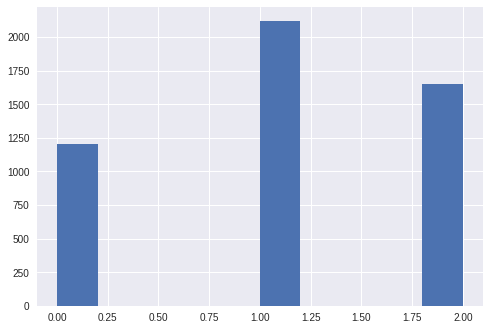

In [29]:
import matplotlib.pyplot as plt

plt.hist(y_t)
plt.show()

In [30]:
score = np.sum(y_train_label==y_t)/len(y_t)
print(score)

0.8799275945293644


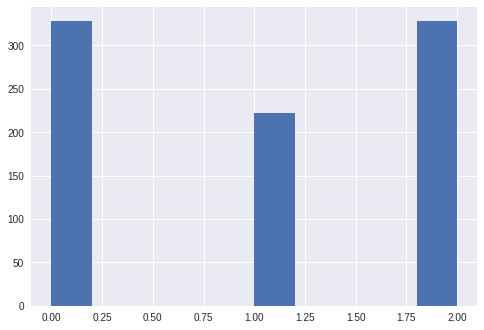

In [31]:
y_ts = clf.predict(x_test_pca)
plt.hist(y_ts)
plt.show()

In [0]:
y_test_label = []

for ohe in y_test:
  if ohe[0] == 1:
    y_test_label.append(0)
  if ohe[1] == 1:
    y_test_label.append(1)
  if ohe[2] == 1:
    y_test_label.append(2)

In [33]:
print(len(y_test_label))

878


In [0]:
score = np.sum(y_test_label==y_ts)/len(y_ts)

In [35]:
print(score)

0.7619589977220956


In [0]:
print(len(y_ts))

878


In [0]:
filename = '/content/svm_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [0]:
filename = '/content/pca_uns.sav'
pickle.dump(pca, open(filename, 'wb'))

In [0]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test_pca, y_test_label)
print(result)

0.744874715261959


In [0]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.transform(x_test2)

In [38]:
! pip install pydrive

    100% |████████████████████████████████| 993kB 17.5MB/s 
  Running setup.py bdist_wheel for pydrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Create & upload a file.
uploaded = drive.CreateFile({'title': 'svm_model.sav'})
uploaded.SetContentFile('/content/svm_model.sav')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1O_EBYmE1HuX5vcTrzG9Cw1Md4EojjsAx


In [39]:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Create & upload a file.
uploaded = drive.CreateFile({'title': 'pca_uns.sav'})
uploaded.SetContentFile('/content/pca_uns.sav')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1xx0Nnravy8MIn5v_aqFsTXDxbwCGCOxZ
